Todo:
- pořešit jednotu zápisů
- podíl největšího nakladatele / 3 největších apod.

In [587]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
import pandas as pd
from src.pocet_stran import pocet_stran
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [588]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))
df = df.explode('008')
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))
df['stran'] = df['300_a'].apply(lambda x: pocet_stran(x))

In [589]:
df = df.dropna(subset=['245_a','100_a','rok'])

In [590]:
df = df.explode('260_b').explode('264_b')

In [591]:
def dvoje_nakladatelstvi(sedesat, sedesatctyri):
    if sedesat != None:
        return sedesat.replace(',','').replace(":",'').strip()
    elif sedesatctyri != None:
        return sedesatctyri.replace(',','').replace(":",'').strip()
    else:
        return None

In [592]:
df['nakladatel'] = df.apply(lambda row: dvoje_nakladatelstvi(row['260_b'], row['264_b']), axis=1)

In [593]:
df[(df['rok'] == 2021) & (df['nakladatel'].isnull())]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,stran,nakladatel
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20243582322,220106t20212021xr a f 010 0 cze d,[978-80-01-06880-9],None,[(brožováno)],"[cze, eng]",[cze],1,None,[72],[Architektura],"[159.953.34, 37.091.3, 378.6:62, 69.01/.03, 72...",[aut],jk01130435,"Šlapeta, Vladimír,",1947-,None,K jubileu výuky architektury na českém vysokém...,autor Vladimír Šlapeta ; editor Jiří Horský ; ...,None,None,"[Vladimír Šlapeta - recollections remarks, Vla...",[První vydání],None,None,None,None,None,None,None,"[V Praze :, None]",None,"[[2021], ©2021]","[1, 4]",[179 stran :],[ilustrace ;],[24 cm],None,None,None,None,[Souběžný anglický text],[1920-2020],"[studium a výuka, vysoké technické školy, stav...","[pe, None, st, au, None, dějiny, None, dějiny,...",None,None,[Česko],None,"[jubilejní publikace, eseje]","[edt, trl]","[mzk2007408165, ntka174143]","[Horský, Jiří, Tharp, Martin,]","[None, 1970-]",[pbl],[kn20010710176],[České vysoké učení technické v Praze.],[Fakulta architektury],None,None,None,cam a22 i 4500,2021.0,179.0,None
nkc20193147778,210527t20212021xr e 000 0 cze d,[978-80-270-6918-7],None,[(brožováno)],[cze],[eng],1,None,[615],[Farmacie. Farmakologie],"[615.214, 615.851:615.214, 615.074-027.236, 61...",[aut],xx0048407,"Metzner, Ralph,",1936-2019,Česky,Ropucha a jaguár :,Ralph Metzner ; s úvodem od Stanislava Grofa a...,None,None,None,[Vydání první],None,None,None,None,None,None,None,"[Ostrava :, None]",None,"[[2021], ©2021]","[1, 4]",[134 stran ;],None,[21 cm],None,None,[1000 výtisků],None,None,None,"[halucinogeny, psychedelická terapie, účinné l...",None,None,None,None,None,[populárně-naučné publikace],"[aft, aui, aft, trl]","[jn19990009830, xx0260797, jn20001227747, xx01...","[Grof, Stanislav,, Grob, Charles S.,, Vančura,...","[1931-, 1950-, 1948-, 1979-]",None,None,None,None,None,None,None,nam a22 i 4500,2021.0,134.0,None
nkc20193162890,191024t20212021xr a a 000 u cze d,[978-80-7292-380-9],None,[(vázáno)],[cze],[fre],1,None,[821-93-053.4],[Literatura pro nejmenší děti],"[821-93-053.4, 636.1/.9, (0.025.2), (086.7)]",[ill],xx0206378,"Billet, Marion,",1982-,Česky,Zvířátka na venkově :,ilustrovala Marion Billet ; z francouzského or...,None,None,None,None,None,None,None,None,None,None,None,"[Praha :, None]",None,"[[2021], ©2021]","[1, 4]",[16 nečíslovaných stran :],[barevné ilustrace ;],[15 cm],[Zvuková knížka],None,[Kartonové listy se zvukovými tlačítky a zvuko...,[Pro děti od 1 roku],None,None,"[domácí zvířata, domestic animals]",None,None,None,None,None,"[leporela, publikace pro nejmenší děti, knihy ...",[trl],[xx0042263],"[Kocmanová, Ivana,]",[1973-],None,None,None,None,[Zvuková knížka (Axióma)],None,None,cam a22 i 4500,2021.0,16.0,None
nkc20203174146,191104t20212021xr a a 000 j cze d,[978-80-7292-384-7],[349.00 Kč],[(vázáno) :],[cze],[fre],1,None,"[78.03, 0/9-053.2]","[Hudební styly, vlivy, školy, Literatura pro d...","[78.036.011.26, 780.61/.66, (0:82-32), (084.11...",[ill],xx0245721,"Le Huche, Magali,",1979-,Česky,Packa hraje rock /,ilustrovala Magali Le Huche ; z francouzského ...,None,None,None,None,None,None,None,None,None,None,None,"[Praha :, None]",None,"[[2021], ©2021]","[1, 4]",[30 nečíslovaných stran :],[barevné ilustrace ;],[21 cm],[Zvuková knížka],None,"[Obálkový podázev: 16 melodií k poslechu, List...",[Pro děti od 3 let],None,None,"[rock, hudební nástroje, rock music, musical i...",None,None,None,None,None,"[příběhy, obrazové publikace, knihy se zvuky, ...",[bkd],[xx0042263],"[Kocmanová, Ivana,]",[1973-],None,None,None,None,[Zvuková knížka (Axióma)],None,None,cam a22 i 4500,2021.0,30.0,None
nkc20203218126,200504t

In [594]:
df[df['nakladatel'].notnull()].groupby('rok').size() / df.groupby('rok').size()

rok
1900.0    1.000000
1901.0    1.000000
1902.0    0.999461
1903.0    0.999441
1904.0    1.000000
1905.0    0.999393
1906.0    0.999527
1907.0    0.999463
1908.0    1.000000
1909.0    1.000000
1910.0    0.999581
1911.0    0.999141
1912.0    1.000000
1913.0    0.999598
1914.0    0.998900
1915.0    1.000000
1916.0    1.000000
1917.0    1.000000
1918.0    0.998911
1919.0    0.999357
1920.0    1.000000
1921.0    1.000000
1922.0    0.999481
1923.0    0.999480
1924.0    0.999058
1925.0    0.999569
1926.0    1.000000
1927.0    0.999747
1928.0    0.998812
1929.0    0.999529
1930.0    0.998560
1931.0    0.999532
1932.0    0.998740
1933.0    0.999245
1934.0    0.999263
1935.0    0.999539
1936.0    0.999797
1937.0    0.999415
1938.0    0.999539
1939.0    0.998543
1940.0    0.998875
1941.0    1.000000
1942.0    0.999555
1943.0    1.000000
1944.0    1.000000
1945.0    0.999124
1946.0    0.999787
1947.0    1.000000
1948.0    0.999546
1949.0    1.000000
1950.0    1.000000
1951.0    1.000000
1952.0  

In [595]:
df['nakladatel'].sample(50)

001
ck9003052                                   Jihočeské nakladatelství
nkc20172900484                                              Brokilon
nos190246654                                           Fr. Bačkovský
cpk19970207634                                                 Libri
bk193204867                                               J. Zelinka
cpk20011027293                                     Stanislav Rosypal
cpk19980300805                               Matice cyrilometodějská
bknhak08335                                            Filmový ústav
nkc20193087964     Univerzita Palackého v Olomouci Pedagogická fa...
nkc20162830251                                              Albatros
nkc20193065297                                          Mladá fronta
cpk19990701707                                              Garamond
nos190254057                                     Klárův ústav slepců
nkc20193146641                                                CooBoo
bk196801008                   

In [596]:
df[df['100_7'].astype(str).str.contains('jx20100301005',na=False)]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,stran,nakladatel
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20182997195,180516s2018 xr g 000 j cze,[978-80-7549-850-2],None,[(vázáno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-32, (0:82-323.1)]",[aut],jx20100301005,"Kašpárek, Michal,",1984-,None,Hry bez hranic /,Michal Kašpárek,None,None,None,[Vydání první],None,None,None,None,None,None,None,[Praha :],"Euromedia,",[2018],[1],[156 stran ;],None,[19 cm],None,None,None,None,None,None,None,None,None,None,None,None,"[české novely, satirické novely, Czech novella...",None,None,None,None,None,None,None,None,None,[Euromedia Group - Listen],None,nam a22 i 4500,2018.0,156.0,Euromedia
nkc20233549616,230925s2023 xr g 000 f cze,[978-80-7637-400-3],None,[(brožováno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],jx20100301005,"Kašpárek, Michal,",1984-,None,Fosilie /,Michal Kašpárek,None,None,None,[Vydání první],None,None,None,None,None,None,None,[V Praze :],"Paseka,",[2023],[1],[183 stran ;],None,[20 cm],None,None,None,None,None,None,None,None,None,None,None,None,"[české romány, Czech fiction]",None,None,None,None,None,None,None,None,None,None,None,nam a22 i 4500,2023.0,183.0,Paseka


In [597]:
df[df['nakladatel'] == 'Listen'].sort_values(by='rok')

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,stran,nakladatel
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk19970277303,980429s1997 xr c e 000 mdcze,[80-902360-0-6],None,[(brož.)],None,None,None,None,[394],[Veřejný a společenský život. Každodenní život],[392/396],[aut],jn19990218034,"Jirků, Irena,",1963-,None,Tvář na dluh /,"[texty Irena Jirků, Marcela Kašpárková, Boris ...",None,None,None,[1. vyd.],None,[Jihlava :],"Listen,",[1997],None,None,None,None,None,None,None,[173 s. :],[portréty ;],[21 cm],None,None,None,None,None,[1940-1997],[každodenní život],None,[1940-1997],[Česko],None,None,[literatura faktu],"[aut, aut, com]","[jn19990218042, jn19990218017, ntka174193]","[Kašpárková, Marcela,, Dočekal, Boris,, Turek,...","[1962-, 1950-, 1939-]",None,None,None,None,None,None,None,nam a22 a 4500,1997.0,173.0,Listen
cpk19980318422,980518s1998 xr c e 000 m cze,[80-902360-1-4],None,[(váz.)],None,None,None,None,[316.4/.7],[Sociální interakce. Sociální komunikace],"[316.346.2, 177.6, 316.346.2-055.2, 7.04, (047...",[aut],jn19990218017,"Dočekal, Boris,",1950-,None,"Pane, to je krása :",Boris Dočekal,None,None,None,[1. vyd.],None,[Jihlava :],"Listen,",[1998],None,None,None,None,None,None,None,[111 s. :],[portréty (některé barev.) ;],[22 cm],None,None,None,None,None,None,"[muži a ženy, partnerské vztahy, ženy, uměleck...",None,None,None,None,None,"[fotografické publikace, rozhovory, photograph...",[aut],[jn19990209462],"[Labuda, Marián,]",[1944-2018],None,None,None,None,None,None,None,nam a22 a 4500,1998.0,111.0,Listen
cpk19990738645,990927s1999 xr acf e 000 macze,[80-902360-2-2],None,[(váz.)],None,None,None,None,"[7.01/.09, 929]","[Umění, Biografie]","[75.071.1, 929, 7.071, 001.83-027.22, (0:82-94)]","[aut, art]",jn19990009901,"Kundera, Rudolf,",1911-2005,None,Rendez-vous s Rudolfem Kunderou :,Irena Jirků,None,None,None,[1. vyd.],None,[Jihlava :],"Listen,",[1999],None,None,None,None,None,None,None,"[117 s., [32] s. obr. příl. (některé barev.) :]","[il., portréty ;]",[22 cm],None,None,"[Životopisná data R. Kundery, Poznámka o význa...",None,None,[20. století],"[malíři, umělci, intelektuální život, painters...",None,"[20. století, 20. století, 20. století, 20th c...","[Česko, None, None, Czechia, None, None]",None,None,"[autobiografické vzpomínky, vzpomínky, autobio...",[aut],[jn19990218034],"[Jirků, Irena,]",[1963-],None,None,None,None,None,None,None,nam a22 a 4500,1999.0,117.0,Listen
cpk20000703085,000505s2000 xr af e 000 macze,[80-902360-3-0],None,[(váz.)],None,None,None,None,[929],[Biografie],"[929, 791/792.071.2, (047.53), (0:82-94)]",[aut],jn19990009653,"Lasica, Milan,",1940-2021,None,Melancholický klaun Milan Lasica :,Boris Dočekal,None,None,None,[1. vyd.],None,[Jihlava :],"Listen,",[2000],None,None,None,None,None,None,None,"[127 s., [8] s. obr. příl. :]",[il. ;],[21 cm],None,None,None,None,None,None,"[herci, Actors and actresses]","[None, Interviews]",None,"[Slovensko, Slovakia]",None,None,"[vzpomínky, rozhovory]",[ivr],[jn19990218017],"[Dočekal, Boris,]",[1950-],None,None,None,None,None,None,None,cam a22 a 4500,2000.0,127.0,Listen
cpk20000980115,010201s2000 xr ac e 000 mdcze,[80-902360-4-9],None,[(váz.)],None,None,None,None,[929],[Biografie],"[929, (437.3), (0:82-94), (082)]",[com],jn19990218017,"Dočekal, Boris,",1950-,None,"Maminka, tatínek a já :",Boris Dočekal,None,None,None,[1. vyd.],None,[Jihlava :],"Listen,",[2000],None,None,None,None,None,None,None,[133 s. :],"[il., portréty ;]",[22 cm],None,None,None,None,None,None,"[osobnosti, osobnosti, celebrities, celebrities]","[None, dětství, None, childhood]",None,"[Česko, None, Czechia, None]",None,None,"[sborníky, vzpomínky, mis

In [598]:
df[df['nakladatel'] == 'Paseka'].sort_values(by='rok')

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,stran,nakladatel
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ck9104408,911009s1990 xr a e 000 f cze,[80-85192-01-2],None,[(vázáno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],jk01060531,"Klíma, Ladislav,",1878-1928,None,Utrpení knížete Sternenhocha :,Ladislav Klíma ; ilustrace Karel Nepraš,None,None,None,[Vydání 3.],None,None,None,None,None,None,None,[Praha :],"Paseka,",[1990],[1],[203 stran :],[ilustrace ;],[21 cm],None,None,[45000 výtisků],None,None,None,None,None,None,None,None,None,"[české romány, Czech fiction]",[ill],[jk01083190],"[Nepraš, Karel,]",[1932-2002],None,None,None,None,None,None,"[Klíma, Ladislav (spisovatel a filozof čes., 1...",nam a22 i 4500,1990.0,203.0,Paseka
np9433293,950103s1990 xr a g 000 f cze,[80-85192-00-4],"[Kčs 37,00]",[(vázáno) :],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, 82-91, 087.6, (437.3), (0:82-31...","[aut, ill]",jk01141125,"Váchal, Josef,",1884-1969,None,Krvavý román /,Josef Váchal,None,None,None,[Vydání třetí],None,None,None,None,None,None,None,[Praha :],"Paseka,",[1990],[1],[318 stran :],[ilustrace ;],[21 cm],[Knihy Josefa Váchala ;],[svazek I.],[40000 výtisků],None,None,None,"[populární literatura, kolportážní literatura,...",None,None,"[Česko, Česko, Czechia, Czechia]",None,None,"[české romány, parodie, autorské knihy, studie...",None,None,None,None,None,None,None,None,None,None,None,nam a22 i 4500,1990.0,318.0,Paseka
cpk20000533892,910220s1990 xr ac e 001 0 cze,[80-85192-03-9],"[Kčs 39,00]",[(váz.) :],None,None,None,None,[641],[Kuchařství. Potraviny. Vařená jídla],"[641.55, (083.12)]",[aut],jk01060037,"Kejřová, Anuše,",1874-1926,None,Úsporná kuchařka :,z vlastních zkušeností napsala a sestavila Anu...,None,None,[Zlatá kniha malé domácnosti],None,None,[Praha :],"Paseka,",[1990],None,None,None,None,None,None,None,[330 s. :],"[il., portréty ;]",[21 cm],None,None,"[95000 výt., Obsahuje rejstřík]",None,None,None,[jídla],None,None,None,None,None,[kuchařské recepty],None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,1990.0,330.0,Paseka
nkc20070535080,920805s1990 xr a g 000 f cze,[80-85192-05-5],"[Kčs 24,00]",[(váz.) :],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-3, (0:82-3)]",[aut],xx0012051,"Cír, Jaroslav,",1966-,None,Zahrada s kocourem /,Jaroslav Cír ; [ilustrovala Lenka Stará],None,None,None,[Vyd. 1.],None,[Praha :],"Paseka,",[1990],None,None,None,None,None,None,None,[101 s. :],[il. ;],[18 cm],None,None,[5000 výt.],None,None,None,None,None,None,None,None,None,[české prózy],None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,1990.0,101.0,Paseka
ck9201658,920410s1991 xr a u0|0 cze,[80-85192-10-1],None,[(váz.)],None,None,None,None,None,None,[718(=924)(437.1/.2)(084.1)],[pht],None,"Ehl, Petr",None,None,Staré židovské hřbitovy Čech a Moravy :,"[fotogr.] Petr Ehl ; [text] Arno Pařík, Jiří F...",None,None,None,[Vyd. 1.],None,[Praha :],"Paseka,",[1991],None,[(Svoboda)],None,None,None,None,None,[173 s. :],[il. ;],[28 cm],None,None,"[Frontispis, Zdobené předsádky, 4000 výt.]",None,None,None,None,None,None,None,None,None,[fotografické publikace],"[aut, aut]","[jo20000074497, jk01031083]","[Pařík, Arno,, Fiedler, Jiří,]","[1948-, 1935-2014]",None,None,None,None,None,None,[Čechy - Morava - hřbitovy židovské - publikac...,nam a22 4500,1991.0,173.0,Paseka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## Nejproduktivnější nakladatelství

In [600]:
df.groupby('nakladatel').size().nlargest(60)

nakladatel
SPN                                  22456
SNTL                                 13344
MOBA                                  9320
Mladá fronta                          8037
Albatros                              7957
Československý spisovatel             6188
Grada                                 6020
Orbis                                 5698
Práce                                 5610
Naše vojsko                           5339
Knižní klub                           5032
ČVUT                                  4842
Dilia                                 4680
Ikar                                  4583
Ivo Železný                           4452
Fragment                              4311
nákladem vlastním                     4270
Odeon                                 4142
Státní pedagogické nakladatelství     4070
Academia                              4003
Svoboda                               3975
Argo                                  3621
Portál                                3382


In [601]:
df[df['rok'] > 2013].groupby('nakladatel').size().nlargest(60)

nakladatel
MOBA                                           3800
Euromedia Group                                2675
Dobrovský s.r.o.                               2511
Fragment                                       2075
Albatros                                       1957
Argo                                           1950
CPress                                         1944
Ikar                                           1683
Host                                           1358
Mladá fronta                                   1351
Grada                                          1250
Svojtka & Co.                                  1243
Portál                                         1212
Knižní klub                                    1157
Grada Publishing                               1049
Nová Forma                                     1016
Univerzita Palackého v Olomouci                 924
Wolters Kluwer                                  914
Academia                                        886
B

## Počet jednotlivých nakladatelství

<Axes: xlabel='rok'>

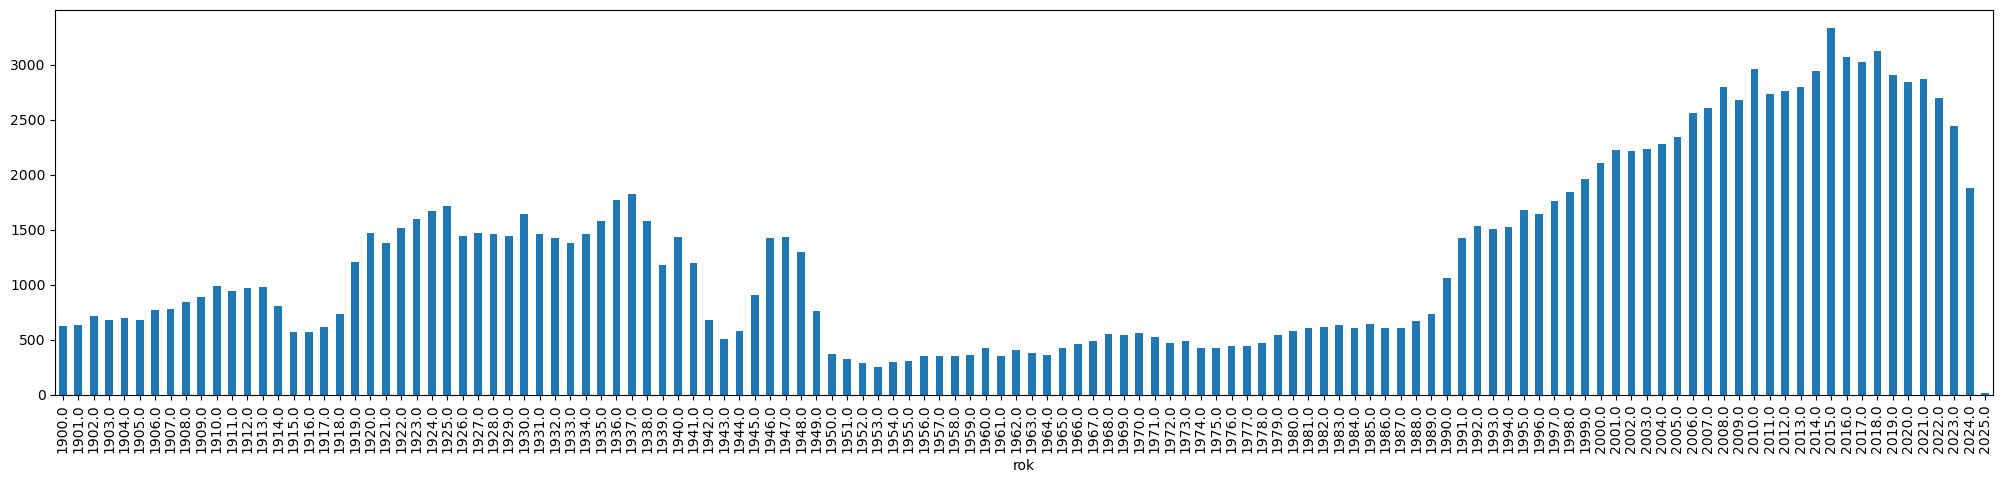

In [603]:
df.groupby('rok')['nakladatel'].nunique().plot.bar(figsize=(25,5))

In [604]:
df.groupby('rok')['nakladatel'].nunique().nlargest()

rok
2015.0    3332
2018.0    3122
2016.0    3072
2017.0    3027
2010.0    2962
Name: nakladatel, dtype: int64

In [605]:
df[df['rok'] == 1953].groupby('nakladatel').size().nlargest(15)

nakladatel
SPN                                           605
SNTL                                          334
Orbis                                         314
Práce                                         199
Československý spisovatel                     173
Naše vojsko                                   149
SZN                                           139
Státní pedagogické nakladatelství             128
Nakladatelství Československé akademie věd    126
SNDK                                          125
SNKLHU                                        122
ČDLJ                                          120
SZdN                                           97
Mladá fronta                                   87
SNPL                                           82
dtype: int64

## Počet nových nakladatelství

<Axes: xlabel='rok'>

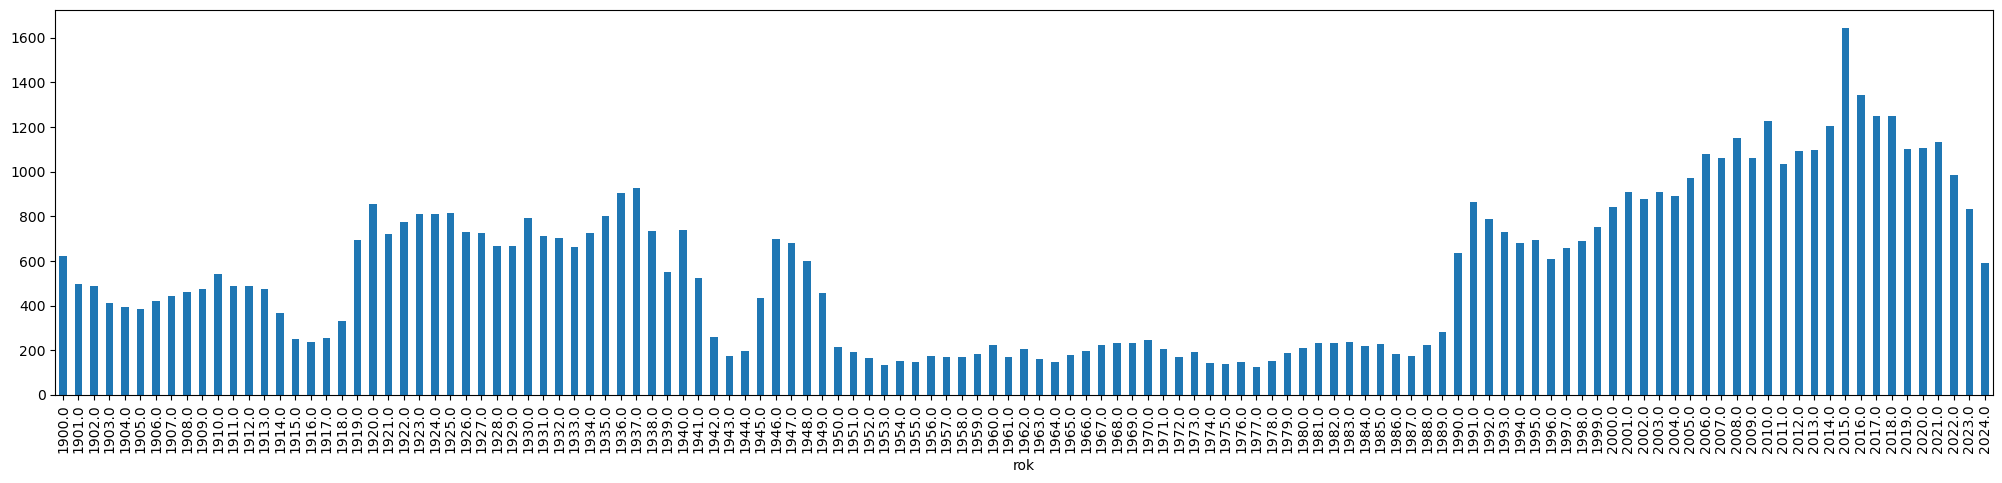

In [607]:
pd.DataFrame(df.groupby('nakladatel')['rok'].min()).groupby('rok').size().plot.bar(figsize=(25,5))

## Počet končících nakladatelství

<Axes: xlabel='rok'>

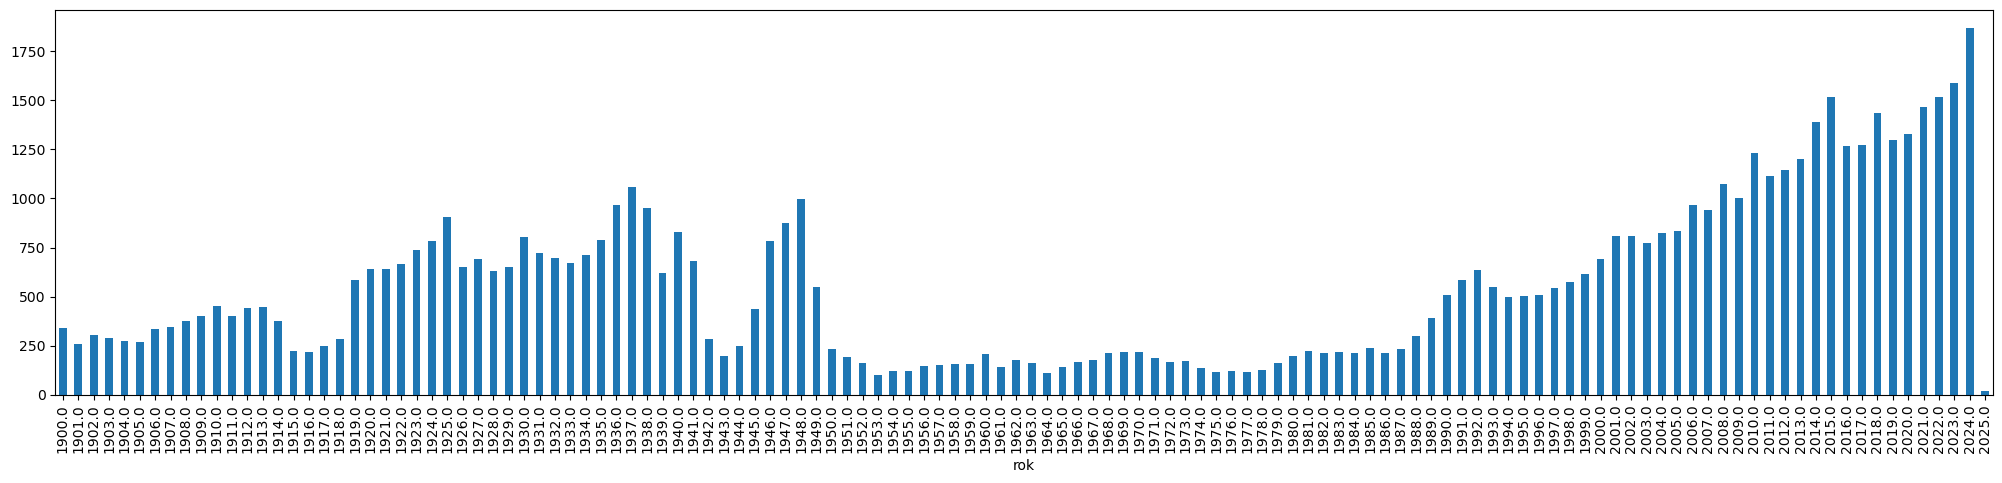

In [609]:
pd.DataFrame(df.groupby('nakladatel')['rok'].max()).groupby('rok').size().plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

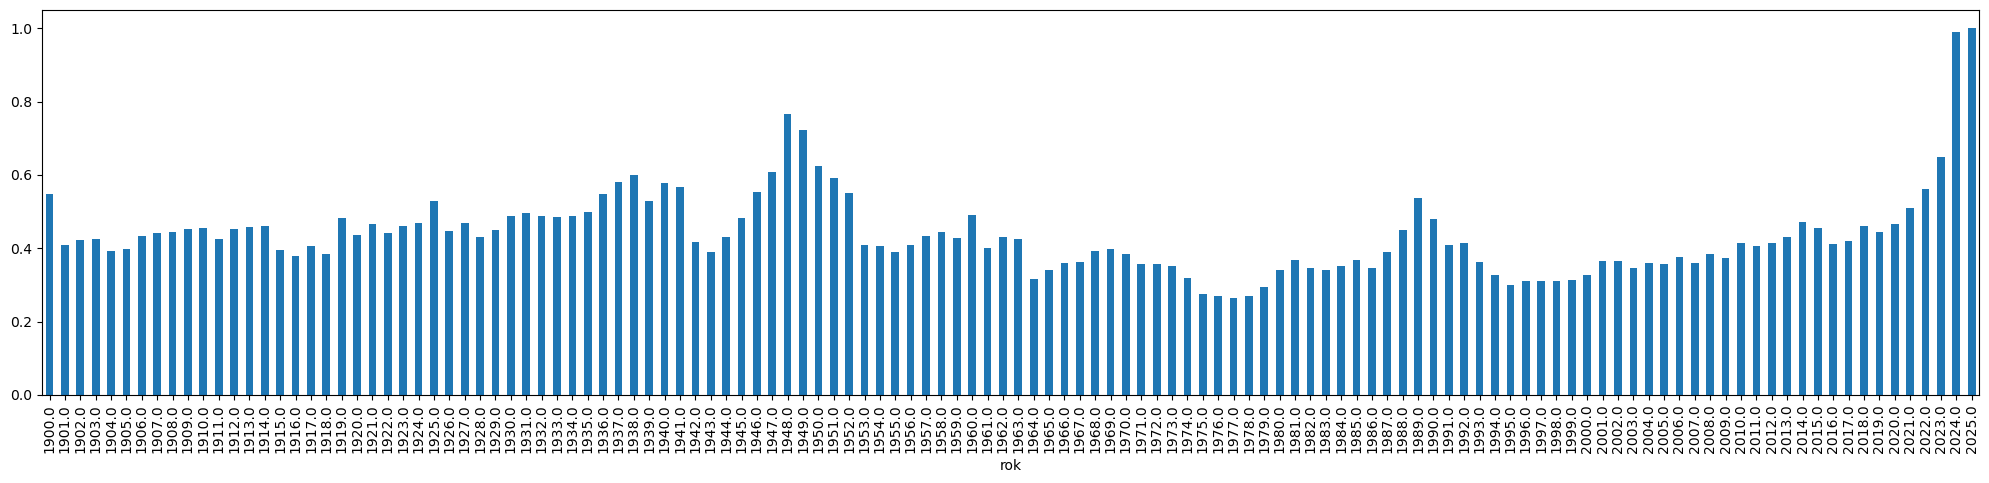

In [610]:
(pd.DataFrame(df.groupby('nakladatel')['rok'].max()).groupby('rok').size() / df.groupby('rok')['nakladatel'].nunique()).plot.bar(figsize=(25,5))

In [611]:
(pd.DataFrame(df.groupby('nakladatel')['rok'].max()).groupby('rok').size() / df.groupby('rok')['nakladatel'].nunique()).nlargest(10)

rok
2025.0    1.000000
2024.0    0.990972
1948.0    0.766513
1949.0    0.723684
2023.0    0.650020
1950.0    0.625000
1947.0    0.609211
1938.0    0.600126
1951.0    0.591463
1937.0    0.580504
dtype: float64

In [612]:
pd.DataFrame(df[df['rok'] < 1990].groupby('nakladatel')['rok'].max()).groupby('rok').size().nlargest(5)

rok
1937.0    1078
1948.0    1027
1936.0     978
1938.0     967
1925.0     915
dtype: int64

In [613]:
pd.DataFrame(df.groupby('nakladatel')['rok'].max()).groupby('rok').size()

rok
1900.0     341
1901.0     260
1902.0     304
1903.0     288
1904.0     275
1905.0     272
1906.0     336
1907.0     345
1908.0     377
1909.0     402
1910.0     452
1911.0     400
1912.0     442
1913.0     450
1914.0     374
1915.0     226
1916.0     218
1917.0     250
1918.0     283
1919.0     585
1920.0     642
1921.0     641
1922.0     669
1923.0     738
1924.0     785
1925.0     908
1926.0     649
1927.0     693
1928.0     632
1929.0     650
1930.0     803
1931.0     723
1932.0     699
1933.0     671
1934.0     712
1935.0     789
1936.0     969
1937.0    1060
1938.0     950
1939.0     623
1940.0     830
1941.0     680
1942.0     283
1943.0     199
1944.0     251
1945.0     438
1946.0     786
1947.0     873
1948.0     998
1949.0     550
1950.0     235
1951.0     194
1952.0     162
1953.0     104
1954.0     122
1955.0     122
1956.0     145
1957.0     155
1958.0     157
1959.0     157
1960.0     208
1961.0     142
1962.0     178
1963.0     162
1964.0     114
1965.0     144
1966.0

## Grafy

In [615]:
import altair as alt

In [616]:
def irozhlas_conf():

    return {
        "config" : {
             "title": {'font': "Noticia Text",
                      'fontSize': 14,
                      'anchor': 'start',
                       'fontWeight': 'bolder',
                    'subtitleFont': 'Noticia Text',
                      'subtitleFontSize': 12,
                       'subtitleFontWeight': 'lighter',
                      'subtitlePadding': 12,
                       'dy': -12,
                      },
             "axis": {
                "labelFont": "Asap",
                "titleFont": "Asap",
                 "fontWeight": "lighter",
                "titleFontWeight": "lighter",
                "labelFontSize": 10,
                "titleFontSize": 10,
                'labelPadding': 2,
                 'titlePadding': 10
            },
            "legend": {
                "labelFont": "Asap",
                "labelFontWeight": "normal",
                "titleFont": "Asap",
                "titleFontWeight": "normal",
                "labelFontSize": 10,
                "titleFontSize": 10
            }
        }
    }

alt.themes.register('irozhlas', irozhlas_conf)
alt.themes.enable('irozhlas')

ThemeRegistry.enable('irozhlas')

In [617]:
nakladatelstvi_s_tremi_knihami = df.groupby("nakladatel").size()
nakladatelstvi_s_tremi_knihami = nakladatelstvi_s_tremi_knihami[nakladatelstvi_s_tremi_knihami >= 3].index.to_list()
df_aspon_tri = df[df['nakladatel'].isin(nakladatelstvi_s_tremi_knihami)]

In [618]:
jednotliva = pd.DataFrame(df_aspon_tri.groupby('rok')['nakladatel'].nunique()).reset_index().rename(columns={"nakladatel": "celkem"})
nova = pd.DataFrame(df_aspon_tri.groupby('nakladatel')['rok'].min()).groupby('rok').size().reset_index().rename(columns={0: "nová"})
koncici = pd.DataFrame(df_aspon_tri.groupby('nakladatel')['rok'].max()).groupby('rok').size().reset_index().rename(columns={0: "končící"})
do_grafu = jednotliva.merge(nova, on="rok", how="left")
do_grafu = do_grafu.merge(koncici, on="rok", how="left")
do_grafu = do_grafu.melt(id_vars="rok")
do_grafu = do_grafu[do_grafu['rok'] >= 1920]
do_grafu = do_grafu[do_grafu['rok'] <= 2020]
do_grafu['rok'] = pd.to_datetime(do_grafu['rok'].apply(lambda x: f"{int(x)}-01-01"))
do_grafu

,rok,variable,value
20,1920-01-01,celkem,815.0
21,1921-01-01,celkem,758.0
22,1922-01-01,celkem,866.0
23,1923-01-01,celkem,910.0
24,1924-01-01,celkem,964.0
25,1925-01-01,celkem,967.0
26,1926-01-01,celkem,813.0
27,1927-01-01,celkem,830.0
28,1928-01-01,celkem,878.0
29,1929-01-01,celkem,837.0


In [619]:
alt.Chart(do_grafu).mark_line().encode(
    x='rok:T',
    y='value:Q',
    color='variable:N',
)

C:\Users\micha\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [620]:
from textwrap import wrap

In [768]:
titulek='Kolik různých nakladatelství vydávalo knihy'
podtitulek="Nejhůř poznamenaly pestrost nakladatelské scény nacistická okupace a komunistický režim. Do grafu se promítají pouze nakladatelství tří a více knih."
podtitulek=wrap(podtitulek, 60)

In [764]:
graf_nakl = alt.Chart(do_grafu, title={'text': titulek, 'subtitle': podtitulek}, width=300).mark_area().encode(
    alt.X("rok:T", 
          title=None,
          axis=alt.Axis(domainOpacity=0, tickColor='#DCDDD6')
    ),
    alt.Y('value:Q', 
          axis=alt.Axis(domainOpacity=0, tickColor='#DCDDD6', orient='right', format='~s'), 
          title=None
    ),
    alt.Color("variable:N", 
              scale=alt.Scale(range=['#DB842F', '#81A9D5', '#E09DA3']), ## '# ['#a7ddd6','#001f80','#e6e6e4','#e5db00','#e49996','#9cc002']), 
              title=None, 
              legend=None
    ),
    row=alt.Row(
        "variable:N", 
        title=None, 
        spacing=15, 
        header=alt.Header(labelAngle=0, labelAlign='left', labelAnchor='middle', labelFont='Asap'),
                sort=['celkem', 'nová', 'končící'],

    )
).resolve_axis(
    x='independent'
).resolve_scale(
    y='independent'
).properties(height=100, width=300)

graf_nakl

C:\Users\micha\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [623]:
graf_nakl['title']['subtitle']

['Nejhůř poznamenaly pestrost nakladatelské scény nacistická',
 'okupace a komunistický puč. Do grafu se promítají pouze',
 'nakladatelství tří a více knih.']

In [624]:
def me_to_neurazi(zaklad_grafu, soubor, kredity):

    os.makedirs("grafy", exist_ok=True)
    
    credits = pl.DataFrame({'text': [kredity]})
    credits = alt.Chart(credits.to_pandas(), width=300).encode(text=alt.Text('text:N')).mark_text(fontSize=10,font="Asap", baseline='line-bottom')
    combined_chart = alt.vconcat(zaklad_grafu, credits)

    combined_chart.save(os.path.join("grafy",f"{soubor}.svg"))
    combined_chart.save(os.path.join("grafy",f"{soubor}.png"), ppi=400)

    print(f"""<a href="https://michalkasparek.cz/sklad/podily_jazyku.svg" target="_blank"><img src="https://michalkasparek.cz/sklad/{soubor}.svg" alt="{subtitle}" width="100%" style="background-color: white; padding: 0.2em 0 0.6em 0"></img></a>""")
    
    return combined_chart

In [625]:
import polars as pl

In [766]:
me_to_neurazi(graf_nakl, 'nakladatelstvi', "zdroj dat: Česká národní bibliografie · vizualizace: iROZHLAS.cz · 2025")

C:\Users\micha\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\micha\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\micha\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\micha\anaconda3\Lib\site-packages\altair\utils\core.

<a href="https://michalkasparek.cz/sklad/podily_jazyku.svg" target="_blank"><img src="https://michalkasparek.cz/sklad/nakladatelstvi.svg" alt="fdfdf" width="100%" style="background-color: white; padding: 0.2em 0 0.6em 0"></img></a>


C:\Users\micha\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\micha\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.VConcatChart(...)

### Podíl největšího

In [628]:
nakl = df.groupby(["nakladatel","rok"]).size().reset_index().rename(columns={0: 'knih'})
knih_za_rok = nakl.groupby("rok")["knih"].sum().reset_index().rename(columns={'knih': 'celkem'})
nakl = nakl.merge(knih_za_rok, on="rok", how="left")
nakl['podíl'] = nakl['knih'] / nakl['celkem']
nakl

,nakladatel,rok,knih,celkem,podíl
0,"""Ars"" Doležal & Steinbrener",1944.0,2,2187,0.000914
1,"""Cíl""",1948.0,1,4403,0.000227
2,"""Diasan"" - dietní stanice pro diabetiky",1938.0,1,4333,0.000231
3,"""Dillia"" Čs. divadelní a literární jednatelství",1958.0,1,3940,0.000254
4,"""Domov""",1942.0,1,2244,0.000446
...,...,...,...,...,...
157743,Žďárský,1919.0,1,3107,0.000322
157744,Žďárský,1920.0,1,3950,0.000253
157745,Žďárský,1946.0,1,4701,0.000213
157746,Žďárský obzor,1909.0,1,2110,0.000474


In [629]:
str(nakl.sample(8))

'                                               nakladatel     rok  knih  \\\n130574                       Zem. výzkum. ústav zootechn.  1922.0     1   \n12526                                              Brázda  1950.0   105   \n123133  Vydala Česká rada Pionýra v nakladatelství Mra...  2001.0     1   \n78978                                          OS Pahonia  2014.0     1   \n59629                                   MVDr. Josef Goetz  1939.0     1   \n1666                                           A.V. Novák  1937.0     1   \n103489             Spolek ev. duchovních české národnosti  1906.0     1   \n89085                        Podnikový archív n.p. Texlen  1980.0     2   \n\n        celkem     podíl  \n130574    3852  0.000260  \n12526     2916  0.036008  \n123133   10566  0.000095  \n78978    13037  0.000077  \n59629     3427  0.000292  \n1666      5127  0.000195  \n103489    2114  0.000473  \n89085     4563  0.000438  '

In [630]:
nakl.sort_values(by='podíl', ascending=False)

,nakladatel,rok,knih,celkem,podíl
98360,SPN,1960.0,782,4322,0.180935
84064,Orbis,1943.0,332,1851,0.179363
98365,SPN,1965.0,684,3821,0.179011
98361,SPN,1961.0,728,4348,0.167433
98362,SPN,1962.0,687,4140,0.165942
...,...,...,...,...,...
79935,Obec Trojanovice ;,2008.0,1,13500,0.000074
79937,Obec Trpín,2008.0,1,13500,0.000074
15071,Compacta,2008.0,1,13500,0.000074
153821,České a slovenské nakladatelství,2008.0,1,13500,0.000074


In [631]:
samonaklad = ['nákladem vlastním','nákl. vlast.','nákl. vl.']

In [632]:
nenahrazeni

{'Euromedia': 'Euromedia',
 'Ivo Železný': 'Ivo Železný',
 'MOBA': 'MOBA',
 'Orbis': 'Orbis',
 'SPN': 'SPN'}

In [698]:
result = nakl[~nakl['nakladatel'].isin(samonaklad)].sort_values(['rok', 'podíl'], ascending=[True, False]).drop_duplicates('rok')
print(result)
result = result[result['rok'].isin(range(1918,2024))]
result['rok'] = pd.to_datetime(result['rok'].apply(lambda x: f"{int(x)}-01-01"))
result = result.replace({'IŽ': 'Železný','Ivo Železný':'Železný','Euromedia Group':'Euromedia'})
nejcastejsi = result.groupby('nakladatel').size() 
print(nejcastejsi.nlargest(15))
nejcastejsi = nejcastejsi[nejcastejsi >=5 ].index.to_list()
print(nejcastejsi)
nenahrazeni = {x : x for x in nejcastejsi}
print(nenahrazeni)
result = pl.from_pandas(result).with_columns(pl.col('nakladatel').replace_strict(nenahrazeni, default='ostatní')).to_pandas()
result

                                               nakladatel     rok  knih  \
76590   Nákladem České akademie císaře Františka Josef...  1900.0    40   
38008                                             J. Otto  1901.0    63   
38009                                             J. Otto  1902.0    91   
38010                                             J. Otto  1903.0    85   
38011                                             J. Otto  1904.0    61   
38012                                             J. Otto  1905.0    63   
94153                                           R. Storch  1906.0   193   
9040                                              B. Kočí  1907.0    90   
38015                                             J. Otto  1908.0    80   
76599   Nákladem České akademie císaře Františka Josef...  1909.0    51   
38017                                             J. Otto  1910.0    97   
38018                                             J. Otto  1911.0    82   
38019                    

,nakladatel,rok,knih,celkem,podíl
0,ostatní,1918-01-01,63,1834,0.034351
1,ostatní,1919-01-01,87,3107,0.028001
2,ostatní,1920-01-01,93,3950,0.023544
3,ostatní,1921-01-01,93,3464,0.026848
4,ostatní,1922-01-01,75,3852,0.019470
5,ostatní,1923-01-01,72,3847,0.018716
6,ostatní,1924-01-01,104,4244,0.024505
7,ostatní,1925-01-01,112,4643,0.024122
8,ostatní,1926-01-01,140,4150,0.033735
9,ostatní,1927-01-01,125,3950,0.031646


In [634]:
result['nakladatel'].nunique()

6

In [702]:
razeni = result['nakladatel'].drop_duplicates().to_list()

In [746]:
titulek2 = "Podíl největšího nakladatelství na vydaných knihách"
podtitulek2 = wrap("Za první republiky vydávali nejvíce knih střídavě J. Otto, B. Kočí, Jos. R. Vilímek a Fr. Švejda, často se také na první příčce objevoval samonáklad. Monopol Státního pedagogického nakladatelství za socialismu krátkodobě narušovalo Státní nakladatelství technické knihy. Po revoluci se krátkodobě prosadila nakladatelství Harlequin, BB art, Grada a univerzitní nakladatelství ČVUT a UPOL.",70)

In [760]:
graf_nejvesi = alt.Chart(result, title={'text': titulek2, 'subtitle': podtitulek2}, width=330).mark_bar().encode(
    alt.X("rok:T", 
          title=None,
          axis=alt.Axis(domainOpacity=0, tickColor='#DCDDD6')
    ),
    alt.Y('podíl:Q', 
          axis=alt.Axis(domainOpacity=0, tickColor='#DCDDD6', orient='left', labelExpr="datum.label * 100 + ' %'"), 
          title=None
    ),
    alt.Color("nakladatel:N", 
              scale=alt.Scale(range=['#E0DAB5','#7C8CCE', '#E7666E', '#FDD22B', '#E79F74', '#7CA6E1']), ## '# ['#a7ddd6','#001f80','#e6e6e4','#e5db00','#e49996','#9cc002']), 
              title=None,
               sort=razeni,
              legend=alt.Legend(orient="top")
    ))

graf_nejvesi

C:\Users\micha\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [637]:
me_to_neurazi(graf_nejvesi, 'nakladatelstvi_nejvetsi', "zdroj dat: Česká národní bibliografie · vizualizace: iROZHLAS.cz · 2025")

C:\Users\micha\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\micha\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\micha\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\micha\anaconda3\Lib\site-packages\altair\utils\core.

<a href="https://michalkasparek.cz/sklad/podily_jazyku.svg" target="_blank"><img src="https://michalkasparek.cz/sklad/nakladatelstvi_nejvetsi.svg" alt="fdfdf" width="100%" style="background-color: white; padding: 0.2em 0 0.6em 0"></img></a>


C:\Users\micha\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\micha\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.VConcatChart(...)